In [18]:
import datetime as dt
from collections import OrderedDict
import csv
from pathlib import Path
import scipy
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [20.0, 8.0] # Default: [6.0, 4.0]

In [97]:
df = pd.read_csv('../data/csv/oving5/0141126194/Card.csv', index_col=0, parse_dates=True)

In [98]:
df

,SourceEdit1,SizeMeasure1,WarningCount1,SourceEdit2,SizeMeasure2,WarningCount2,JunitTest1,SuccessCount1,FailureCount1,ErrorCount1,...,SuccessCount2,FailureCount2,ErrorCount2,Completion2,JunitTest3,SuccessCount3,FailureCount3,ErrorCount3,Completion3,Launch1
2017-02-23 22:56:38,1.0,32.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-23 22:56:38,NaN,NaN,NaN,1.0,73.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-23 22:57:24,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-23 22:59:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-23 22:59:29,NaN,NaN,NaN,1.0,77.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-23 23:00:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-23 23:02:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-23 23:03:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-23 23:13:12,NaN,NaN,NaN,1.0,80.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-23 23:13:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,0.0,0.666667,NaN,NaN,NaN,NaN,NaN,NaN


## Creating relative time column

In [72]:
def create_relative_time_column(df):

    df['Relative_time'] = dt.timedelta(seconds=0)  # Setting all the rows to 0, but only the first row will remain 0

    for i in range(1, len(df)):
        diff = df.index[i] - df.index[i-1]
        if diff.seconds > 600:
            diff = dt.timedelta(seconds=600)
        accumulated = df.Relative_time.iloc[i-1] + diff
        df.Relative_time.iat[i] = accumulated
    return df

In [99]:
df = create_relative_time_column(df)

In [114]:
df.filter(regex='SourceEdit')

,SourceEdit1,SourceEdit2,SourceEdit3,SourceEdit
2017-02-23 22:56:38,1.0,NaN,NaN,1.0
2017-02-23 22:56:38,NaN,1.0,NaN,1.0
2017-02-23 22:57:24,NaN,NaN,NaN,NaN
2017-02-23 22:59:26,NaN,NaN,1.0,1.0
2017-02-23 22:59:29,NaN,1.0,NaN,1.0
2017-02-23 23:00:53,NaN,NaN,1.0,1.0
2017-02-23 23:02:30,NaN,NaN,1.0,1.0
2017-02-23 23:03:17,NaN,NaN,1.0,1.0
2017-02-23 23:13:12,NaN,1.0,NaN,1.0
2017-02-23 23:13:40,NaN,NaN,NaN,NaN


## Forward-filling and aggregating data

In [101]:
def forward_fill_columns(df):
    df.update(df.filter(regex='^SizeMeasure\d{1,}$').ffill())  # Forward-filling all columns beginning with 'SizeMeasure'
    df.update(df.filter(regex='^WarningCount\d{1,}$').ffill())  # Forward-filling all columns beginning with 'WarningCount'
    df.update(df.filter(regex='^Completion\d{1,}$').ffill())  # Forward-filling all columns beginning with 'Completion'
    df.update(df.filter(regex='^SuccessCount\d{1,}$').ffill())  # Forward-filling all columns beginning with 'SuccessCount'
    df.update(df.filter(regex='^FailureCount\d{1,}$').ffill())  # Forward-filling all columns beginning with 'FailureCount'
    df.update(df.filter(regex='^ErrorCount\d{1,}$').ffill())  # Forward-filling all columns beginning with 'ErrorCount'
    return df

In [200]:
def aggregate_columns(df):
    df['TotalSizeMeasure'] = df.filter(regex='^SizeMeasure\d{1,}$').sum(axis=1)
    # We get the total completion by averaging all the Completion columns. Not skipping NaNs so we always require all values
    df['TotalCompletion'] = df.filter(regex='^Completion\d{1,}$').mean(skipna=False, axis=1)
    # Setting SourceEdit and JunitTest to 1 where any of the SourceEdit# or JunitTest# columns are 1
    df['SourceEdit'] = np.nan
    df.SourceEdit.iloc[np.where(df.filter(regex='^SourceEdit\d{1,}$') == 1)[0]] = 1
    df['JunitTest'] = np.nan
    df.JunitTest.iloc[np.where(df.filter(regex='^JunitTest\d{1,}$') == 1)[0]] = 1
    df['Launch'] = np.nan
    df.Launch.iloc[np.where(df.filter(regex='^Launch\d{1,}$') == 1)[0]] = 1
    return df

In [113]:
df = forward_fill_columns(df)
df = aggregate_columns(df)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## Plotting

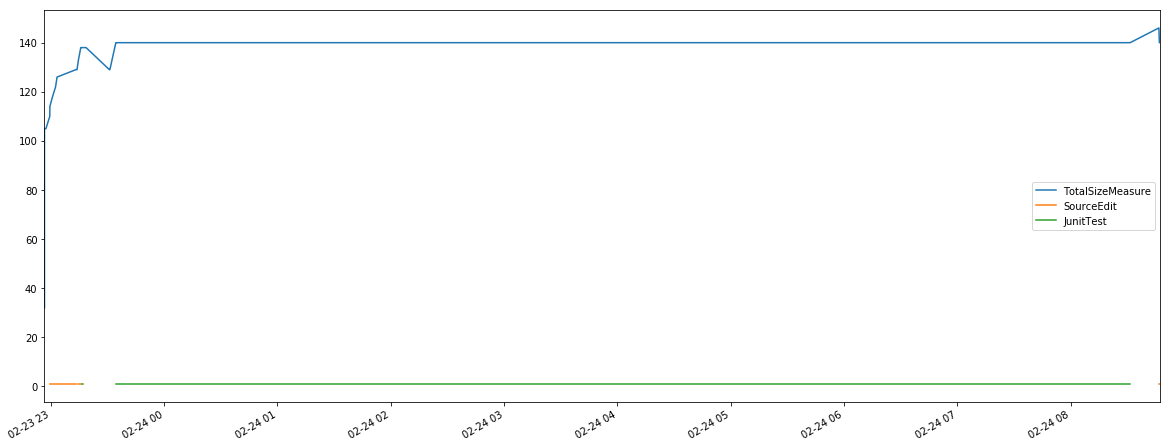

In [217]:
df_plot = df[['Relative_time', 'TotalSizeMeasure', 'SourceEdit', 'JunitTest']]
df_plot.plot()

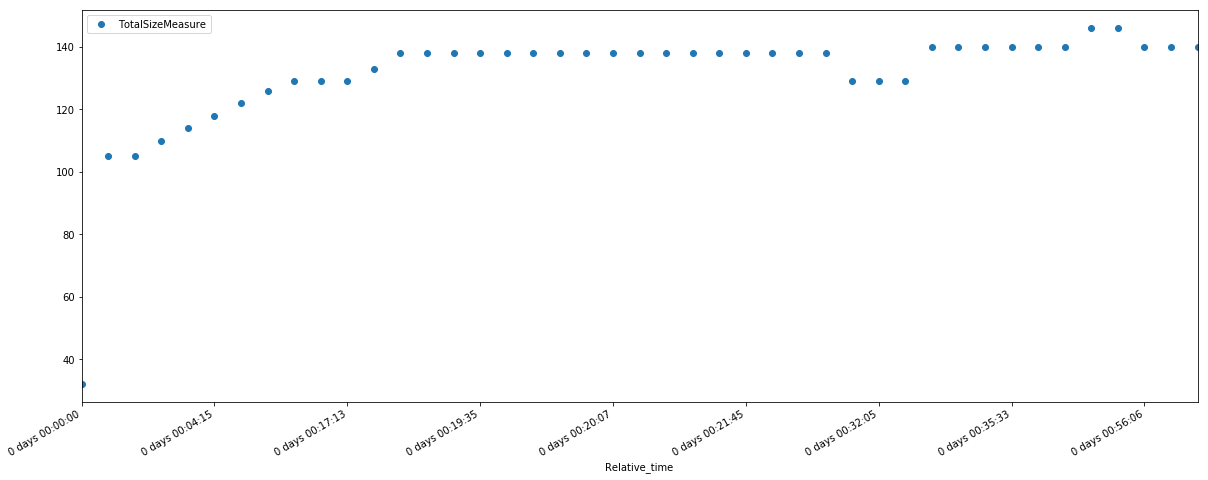

In [10]:
df.plot(x='Relative_time', y='TotalSizeMeasure', style='o')

In [187]:
scaler = MinMaxScaler().fit(df.drop('Relative_time', axis=1).fillna(0))
scaler.transform(df.drop('Relative_time', axis=1).fillna(0))

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.64035088,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.64035088,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.94736842,  1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.94736842,  1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.94736842,  1.        ]])

## Importing the grades into a dictionary where the keys are username hashes

In [115]:
grades = OrderedDict()
with open('../brukernummer-karakter.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=['hash', 'grade'])
    for row in reader:
        grades[row['hash']] = row['grade']

In [116]:
grades

OrderedDict([('1961606504', 'D'),
             ('0003195112', 'A'),
             ('2370221083', 'A'),
             ('3417169296', 'C'),
             ('3049944332', 'F'),
             ('3169265502', 'B'),
             ('1309367009', 'A'),
             ('2900473238', 'F'),
             ('0100313338', 'F'),
             ('3528648608', 'F'),
             ('3635712884', 'F'),
             ('3172735784', 'A'),
             ('3092715252', 'C'),
             ('2885425503', 'F'),
             ('0053596332', 'A'),
             ('3401034429', 'C'),
             ('3311094284', 'B'),
             ('1395134805', 'E'),
             ('0244999521', 'C'),
             ('4025554098', 'F'),
             ('1625178573', 'F'),
             ('3447007398', 'F'),
             ('2747401993', 'A'),
             ('2877527733', 'C'),
             ('1843717383', 'F'),
             ('0109441257', 'F'),
             ('3810295105', 'C'),
             ('3565377643', 'C'),
             ('0312660958', 'C'),
             (

## Creating features from the raw data

In [155]:
def get_features(df, hash_id):
    df = create_relative_time_column(df)
    df = forward_fill_columns(df)
    df = aggregate_columns(df)
    #if 'TotalSizeMeasure' not in df.columns:
    #    return None
    f_df = pd.DataFrame(index=[hash_id])
    f_df['MaxSizeMeasure'] = df.TotalSizeMeasure.max()
    f_df['FinalSizeMeasure'] = df.TotalSizeMeasure.iloc[-1]  # Works because SizeMeasure is forward-filled!
    f_df['JunitRuns'] = df.filter(regex='^JunitTest\d{1,}$').sum().sum()
    if f_df.JunitRuns.item() == 0:
        print('{} not valid'.format(hash_id))
        return None
    #if df.Completion.last_valid_index() is None:
        #return None
    #f_df['FinalCompletion'] = df.loc[df.Completion.last_valid_index()].Completion
    f_df['SizeMeasure_times_JunitRuns'] = (f_df.FinalSizeMeasure * f_df.JunitRuns)[-1]
    f_df['SizeMeasure_times_Completion_avg'] = (df.TotalSizeMeasure * df.TotalCompletion).mean()
    f_df['MinutesSpent'] = df.Relative_time.iloc[-1].seconds / 60
    if f_df.MinutesSpent.item() < 5:
        print('Student {} spent less than 5 minutes, discarded'.format(hash_id))
        return None
    if hash_id not in grades:
        print('No grade found for {}'.format(hash_id))
        return None
    f_df['Grade'] = grades[hash_id]
    return f_df

In [153]:
features_df = get_features(df, '0141126194')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [154]:
features_df

,MaxSizeMeasure,FinalSizeMeasure,JunitRuns,SizeMeasure_mult_JunitRuns,SizeMeasure_times_Completion_avg,MinutesSpent,Grade
0141126194,146.0,140.0,21.0,2940.0,116.626263,56.683333,A


## Loading all csv files for a given part of an exercise:

In [209]:
df_partner = pd.DataFrame() 
directory_in_str = '../data/csv/oving5'
pathlist = Path(directory_in_str).glob('**/Card.csv')
for path in pathlist:
    path = str(path)
    user_df = pd.read_csv(path, index_col=0, parse_dates=True)
    feature_df = get_features(user_df, path.split('\\')[-2])
    df_partner = df_partner.append(feature_df)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Student 0807733537 spent less than 5 minutes, discarded
Student 3092725296 spent less than 5 minutes, discarded


In [210]:
df_partner

,MaxSizeMeasure,FinalSizeMeasure,JunitRuns,SizeMeasure_times_JunitRuns,SizeMeasure_times_Completion_avg,MinutesSpent,Grade
0002631013,112.0,111.0,8.0,888.0,77.045752,10.550000,A
0141126194,146.0,140.0,21.0,2940.0,116.626263,56.683333,A
0180898504,165.0,146.0,17.0,2482.0,97.079665,90.733333,D
0197753146,146.0,143.0,8.0,1144.0,97.603175,61.966667,F
0245535249,147.0,136.0,37.0,5032.0,136.000000,96.766667,C
0255397888,190.0,176.0,15.0,2640.0,130.196237,135.500000,C
0257245424,127.0,124.0,52.0,6448.0,88.726368,112.033333,A
0338511066,118.0,82.0,7.0,574.0,89.629630,69.566667,D
0839266171,131.0,131.0,14.0,1834.0,85.476190,36.100000,F
1395170627,157.0,157.0,4.0,628.0,133.400000,39.583333,C


In [201]:
grade_dict = {
    'A': 5,
    'B': 4,
    'C': 3,
    'D': 2,
    'E': 1,
    'F': 0,
}

In [202]:
df_partner.Grade = df_partner.Grade.apply(lambda x: grade_dict[x])

## Training classifier

In [211]:
# Extracting the Grade column and then removing it from the DataFrame
y_column = df_partner[['Grade']].copy().squeeze()
df_partner.drop(['Grade'], axis=1, inplace=True)

In [212]:
training_input, testing_input, training_output, testing_output = train_test_split(df_partner, y_column, test_size=0.33)

In [165]:
input_scaler = MinMaxScaler()
training_input_scaled = input_scaler.fit(training_input).transform(training_input)
validation_input_scaled = input_scaler.fit(validation_input).transform(validation_input)

output_scaler = MinMaxScaler()

In [213]:
classifier = GradientBoostingClassifier(n_estimators=3000, learning_rate=0.1, max_depth=5, verbose=1)
classifier.fit(training_input, training_output)

      Iter       Train Loss   Remaining Time 
         1          28.8708           12.01s
         2          23.1940           10.50s
         3          19.0927           10.50s
         4          15.8554           10.50s
         5          13.0567           10.49s
         6          10.8320           10.99s
         7           9.0299           11.77s
         8           7.5532           12.92s
         9           6.3337           12.97s
        10           5.3211           12.72s
        20           0.9756           10.82s
        30           0.1833            9.72s
        40           0.0346            8.82s
        50           0.0133            8.12s
        60           0.0128            7.41s
        70           0.0121            6.96s
        80           0.0119            6.58s
        90           0.0119            6.30s
       100           0.0119            6.08s
       200           0.0119            4.90s
       300           0.0119            4.38s
       40

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=3000,
              presort='auto', random_state=None, subsample=1.0, verbose=1,
              warm_start=False)

### Predicting using the classifier

In [214]:
prediction_output = classifier.predict(testing_input)
prediction_output

array(['A', 'A', 'C', 'B', 'A', 'A', 'C', 'C', 'C', 'A', 'F', 'F'], dtype=object)

In [215]:
testing_output

3635706237    F
0180898504    D
1685072811    A
0197753146    F
1685072668    A
3442391302    C
1395170627    C
2501285443    E
1854241806    C
0141126194    A
3685854635    A
3433345878    C
Name: Grade, dtype: object

In [216]:
compare = pd.DataFrame(index=testing_output.index)
compare['testing_output'] = testing_output
compare['prediction_output'] = prediction_output
compare

,testing_output,prediction_output
3635706237,F,A
0180898504,D,A
1685072811,A,C
0197753146,F,B
1685072668,A,A
3442391302,C,A
1395170627,C,C
2501285443,E,C
1854241806,C,C
0141126194,A,A


In [ ]:
plt.scatter(df_partner.MaxSizeMeasure, df_partner.SizeMeasure_div_JunitRuns)